In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
# Just testing
array = [[1, 2, 3], [3, 4, 5]]
pytorchArray = torch.tensor(array).float()
print(pytorchArray)

tensor([[1., 2., 3.],
        [3., 4., 5.]])


In [10]:
# This is the model class 
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
        super().__init__() # instantiates our nn.Module model
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [11]:
# picking a random seed for randomization
torch.manual_seed(41)

In [12]:
# instantiating model
model = Model()

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [19]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
dataframe = pd.read_csv(url)

In [20]:
dataframe.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [21]:
dataframe['variety'] = dataframe['variety'].replace('Setosa', 0.0)
dataframe['variety'] = dataframe['variety'].replace('Versicolor', 1.0)
dataframe['variety'] = dataframe['variety'].replace('Virginica', 2.0)
dataframe

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [22]:
X = dataframe.drop('variety', axis=1)
y = dataframe['variety']

X = X.values
y = y.values

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [25]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [26]:
# criterion to measure the error or loss function
criterion = nn.CrossEntropyLoss()

# choose an Optimizer, We are going to use Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [27]:
model.parameters()

<generator object Module.parameters at 0x7ff6c984f120>

In [28]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [34]:
# Actual training of the model
epochs = 200
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train) # get predicted result
    
    # Measuring the loss
    loss = criterion(y_pred, y_train)
    
    # keeping track of losses
    losses.append(loss.detach().numpy())
    
    # print every 10 epochs
    if i% 10 == 0:
        print(f'Epoch {i} and loss{loss}')
     
    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss0.019345339387655258
Epoch 10 and loss0.018610822036862373
Epoch 20 and loss0.017923295497894287
Epoch 30 and loss0.01727520488202572
Epoch 40 and loss0.016660558059811592
Epoch 50 and loss0.016074763610959053
Epoch 60 and loss0.015641624107956886
Epoch 70 and loss0.015031114220619202
Epoch 80 and loss0.014526001177728176
Epoch 90 and loss0.014073057100176811
Epoch 100 and loss0.013644804246723652
Epoch 110 and loss0.013206753879785538
Epoch 120 and loss0.01278148777782917
Epoch 130 and loss0.012371134012937546
Epoch 140 and loss0.011973937042057514
Epoch 150 and loss0.011587503366172314
Epoch 160 and loss0.011213376186788082
Epoch 170 and loss0.010849433951079845
Epoch 180 and loss0.010614373721182346
Epoch 190 and loss0.011007716879248619


Text(0.5, 0, 'epochs')

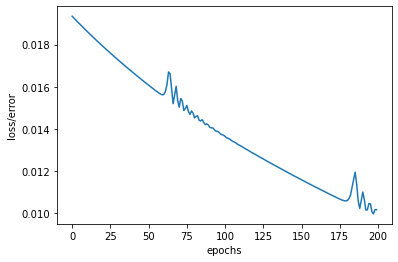

In [35]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")